In [59]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

In [2]:
mushrooms = pd.read_csv("data/mushroom_cleaned.csv")

# standardize
mushrooms_quant = mushrooms.iloc[:, [0, 4, 5, 7]]

scaler = StandardScaler()
mushrooms_quant_standardized = scaler.fit_transform(mushrooms_quant)
mushrooms_quant = pd.DataFrame(mushrooms_quant_standardized, columns=mushrooms_quant.columns)

mushrooms_quali = mushrooms.iloc[:, [1, 2, 3, 6, 8]]
mushrooms = pd.concat([mushrooms_quant, mushrooms_quali], axis=1)

Analyse exploratoire

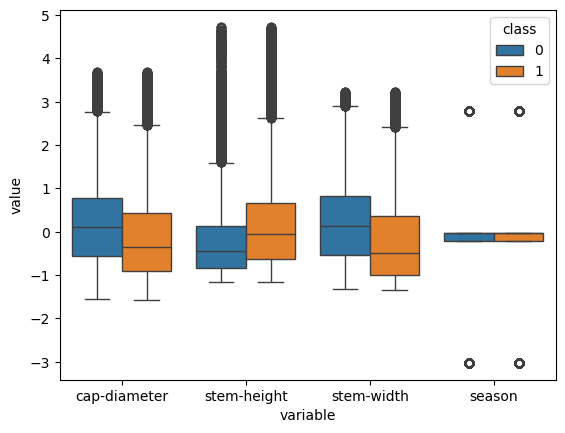

In [3]:
# boxplots
mushrooms_long = mushrooms.melt(id_vars=["cap-shape", "gill-attachment", "gill-color", "stem-color", "class"])
sns.boxplot(x="variable", y="value", hue="class", data=mushrooms_long)
plt.show()

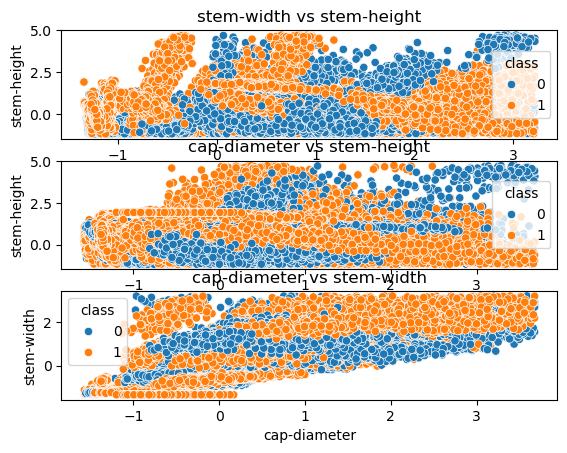

In [4]:
# ？effet taille
plt.subplot(3, 1, 1)
sns.scatterplot(x="stem-width", y="stem-height", data=mushrooms, hue="class")
plt.title("stem-width vs stem-height")

plt.subplot(3, 1, 2)
sns.scatterplot(x="cap-diameter", y="stem-height", data=mushrooms, hue="class")
plt.title("cap-diameter vs stem-height")

plt.subplot(3, 1, 3)
sns.scatterplot(x="cap-diameter", y="stem-width", data=mushrooms, hue="class")
plt.title("cap-diameter vs stem-width")

plt.show()

PCA

<BarContainer object of 4 artists>

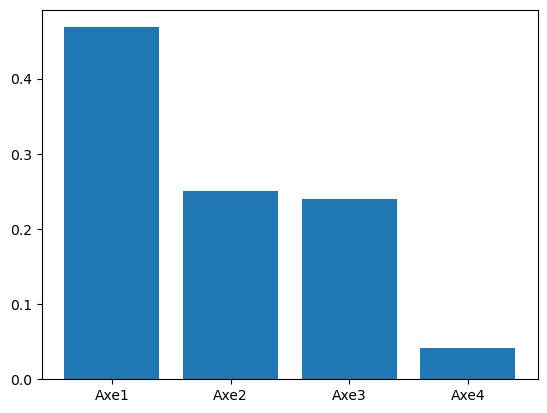

In [5]:
n_components = 4

cls = PCA(n_components=n_components)
pcs_mushrooms = cls.fit_transform(mushrooms_quant)

df_mushrooms = pd.DataFrame(pcs_mushrooms, columns=[f"PC{i}" for i in range(1, n_components+1)])
plt.bar([f"Axe{i}" for i in range(1, n_components+1)], cls.explained_variance_ratio_)

<Axes: xlabel='PC1', ylabel='PC2'>

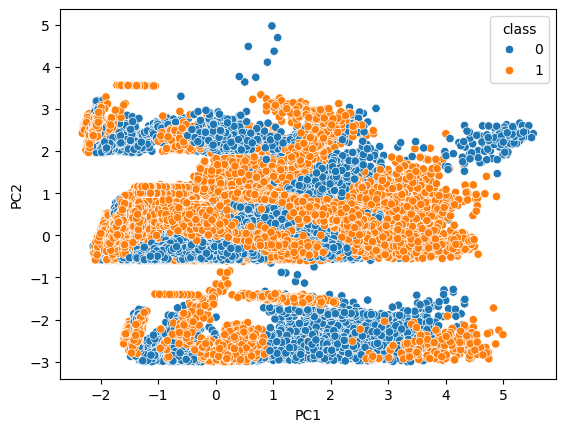

In [6]:
sns.scatterplot(x="PC1", y="PC2", hue=mushrooms["class"], data=df_mushrooms)

In [7]:
taille = mushrooms["cap-diameter"] + mushrooms["stem-height"] + mushrooms["stem-width"] 

In [8]:
mushrooms_quant

,cap-diameter,stem-height,stem-width,season
0,2.236139,4.682845,0.631570,2.788402
1,2.483444,4.682845,0.646914,2.788402
2,2.233361,4.383334,0.658423,2.788402
3,1.927704,4.652283,0.658423,2.788402
4,2.049966,4.536146,0.527996,-0.029348
...,...,...,...,...
54030,-1.373393,0.197600,-0.616434,-0.029348
54031,-1.348385,0.656036,-0.717450,-0.029348
54032,-1.348385,0.240388,-0.597253,-0.208490
54033,-1.356721,0.423762,-0.716172,-0.208490


In [9]:
# 使用箱线图找到极端值
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# 假设你想根据列 'column_name' 去除极端值
mushrooms_cleaned = remove_outliers(mushrooms, "cap-diameter")
mushrooms_cleaned = remove_outliers(mushrooms, "stem-height")
mushrooms_cleaned = remove_outliers(mushrooms, "stem-width")

In [10]:
mushrooms_cleaned

,cap-diameter,stem-height,stem-width,season,cap-shape,gill-attachment,gill-color,stem-color,class
0,2.236139,4.682845,0.631570,2.788402,2,2,10,11,1
1,2.483444,4.682845,0.646914,2.788402,2,2,10,11,1
2,2.233361,4.383334,0.658423,2.788402,2,2,10,11,1
3,1.927704,4.652283,0.658423,2.788402,6,2,10,11,1
4,2.049966,4.536146,0.527996,-0.029348,6,2,10,11,1
...,...,...,...,...,...,...,...,...,...
54030,-1.373393,0.197600,-0.616434,-0.029348,5,3,2,12,1
54031,-1.348385,0.656036,-0.717450,-0.029348,2,3,2,12,1
54032,-1.348385,0.240388,-0.597253,-0.208490,5,3,2,12,1
54033,-1.356721,0.423762,-0.716172,-0.208490,2,3,2,12,1


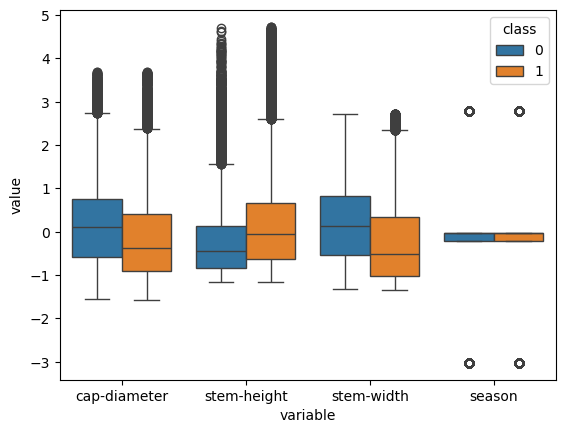

In [11]:
# boxplots
mushrooms_cleaned_long = mushrooms_cleaned.melt(id_vars=["cap-shape", "gill-attachment", "gill-color", "stem-color", "class"])
sns.boxplot(x="variable", y="value", hue="class", data=mushrooms_cleaned_long)
plt.show()

Clustering of Categorical Data

In [12]:
mushrooms = pd.read_csv("data/mushroom_cleaned.csv")

# standardize
mushrooms_quant = mushrooms.iloc[:, [0, 4, 5, 7]]

scaler = StandardScaler()
mushrooms_quant_standardized = scaler.fit_transform(mushrooms_quant)
mushrooms_quant = pd.DataFrame(mushrooms_quant_standardized, columns=mushrooms_quant.columns)

mushrooms_quali = mushrooms.iloc[:, [1, 2, 3, 6, 8]]
mushrooms = pd.concat([mushrooms_quant, mushrooms_quali], axis=1)

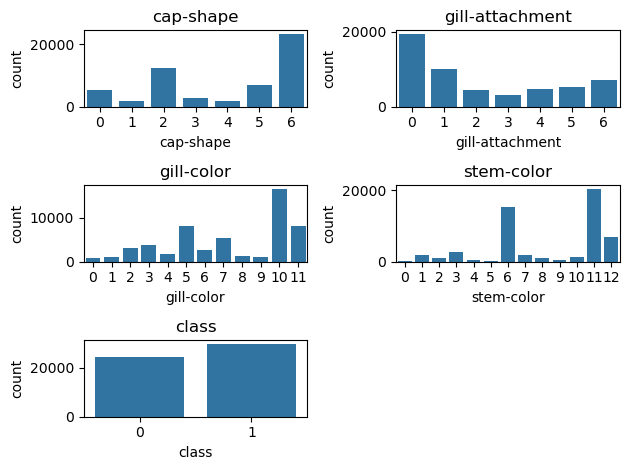

In [27]:
for i in range(1, 6):
    plt.subplot(3, 2, i)
    index = i - 1
    sns.countplot(x=mushrooms_quali.iloc[:, index])
    plt.title(mushrooms_quali.columns[index])
plt.tight_layout()
plt.show()

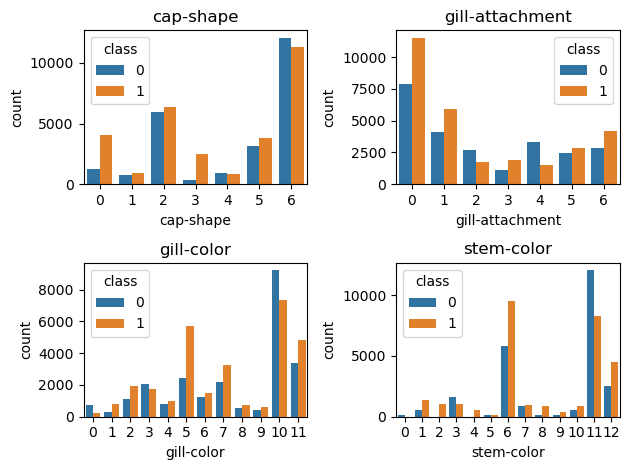

In [28]:
hue = mushrooms_quali.iloc[:, -1]

for i in range(1, 5):
    plt.subplot(2, 2, i)
    index = i - 1
    sns.countplot(x=mushrooms_quali.iloc[:, index], hue=hue)
    plt.title(mushrooms_quali.columns[index])
plt.tight_layout()
plt.show()

In [34]:
mushroom_torun = mushrooms_quali.drop(columns=["class"])

In [54]:
# ohe
ohe = OneHotEncoder(sparse_output=False)

mushroom_torun_ohe = ohe.fit_transform(mushroom_torun)

In [69]:
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=50, random_state=20)
kmeans.fit(mushroom_torun_ohe)
labels = kmeans.labels_
mushrooms_quali['Cluster'] = labels


In [70]:
mushrooms_quali

,cap-shape,gill-attachment,gill-color,stem-color,class,Cluster
0,2,2,10,11,1,1
1,2,2,10,11,1,1
2,2,2,10,11,1,1
3,6,2,10,11,1,1
4,6,2,10,11,1,1
...,...,...,...,...,...,...
54030,5,3,2,12,1,0
54031,2,3,2,12,1,0
54032,5,3,2,12,1,0
54033,2,3,2,12,1,0


In [71]:
y_true = mushrooms_quali["class"]
y_pred = mushrooms_quali["Cluster"]

from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, v_measure_score
from sklearn.metrics import confusion_matrix, classification_report

ari = adjusted_rand_score(y_true, y_pred)
ami = adjusted_mutual_info_score(y_true, y_pred)
v_measure = v_measure_score(y_true, y_pred)

print(f"Adjusted Rand Index: {ari:.2f}")
print(f"Adjusted Mutual Information: {ami:.2f}")
print(f"V-Measure: {v_measure:.2f}")

Adjusted Rand Index: 0.06
Adjusted Mutual Information: 0.04
V-Measure: 0.04


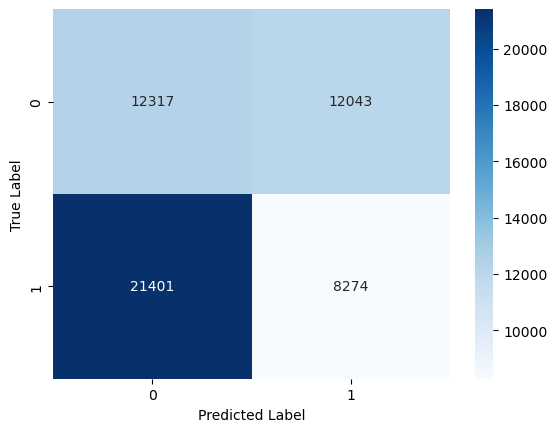

In [72]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()